## 이미지 데이터 모으기



python >= 3.8


In [ ]:
# pip install --upgrade git+https://github.com/Joeclinton1/google-images-download.git
# !pip install --upgrade git+https://github.com/Joeclinton1/google-images-download.git
# !sudo apt install chromium-chromedriver 
# https://chromedriver.chromium.org/downloads

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-yz0lutpw
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-yz0lutpw
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package chromedriver is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'chromedriver' has no installation candidate


In [ ]:
import os
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

pathDir = os.path.abspath(os.path.curdir)
pathDir += "\chromedriver.exe"
print(pathDir)


arguments = {
    "keywords":"tiger,lion",
    "limit":1000,
    "print_urls":True,
    "chromedriver":pathDir    
}  

paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images

## 이미지 데이터, 바이너리 파일로 바꾸기

In [1]:
import PIL
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# data directory
input = os.getcwd() + "/downloads"
output = os.getcwd() + "/downloads/data2.bin"
imageSize = 128 #32
imageDepth = 3
debugEncodedImage = False

# show given image on the window for debug
def showImage(r, g, b):
    temp = []
    for i in range(len(r)):
        temp.append(r[i])
        temp.append(g[i])
        temp.append(b[i])
    show = np.array(temp).reshape(imageSize, imageSize, imageDepth)
    plt.imshow(show, interpolation='nearest')
    plt.show()

# convert to binary bitmap given image and write to law output file
def writeBinaray(outputFile, imagePath, label):
    img = Image.open(imagePath)
    reimg = img.resize((imageSize, imageSize), PIL.Image.ANTIALIAS)
    reimg = (np.array(reimg))
    
    if reimg.shape != (32, 32, 3):
        print("동일하지 않습니다.")
        return
    
    r = reimg[:,:,0].flatten()
    g = reimg[:,:,1].flatten()
    b = reimg[:,:,2].flatten()
    label = [label]

    out = np.array(list(label) + list(r) + list(g) + list(b), np.uint8)
    outputFile.write(out.tobytes())

    # if you want to show the encoded image. set up 'debugEncodedImage' flag
    if debugEncodedImage:
        showImage(r, g, b)

subDirs = os.listdir(input)
numberOfClasses = len(input)

try:
    os.remove(output)
except OSError:
    pass

outputFile = open(output, "ab")
label = -1
totalImageCount = 0
labelMap = []

for subDir in subDirs:
    subDirPath = os.path.join(input, subDir)

    # filter not directory
    if not os.path.isdir(subDirPath):
        continue

    imageFileList = os.listdir(subDirPath)
    label += 1

    print("writing %3d images, %s" % (len(imageFileList), subDirPath))
    totalImageCount += len(imageFileList)
    labelMap.append([label, subDir])

    for imageFile in imageFileList:
        imagePath = os.path.join(subDirPath, imageFile)
        writeBinaray(outputFile, imagePath, label)

outputFile.close()
print("Total image count: ", totalImageCount)
print("Succeed, Generate the Binary file")
print("You can find the binary file : ", output)
print("Label MAP: ", labelMap)

FileNotFoundError: ignored

## 구현한 데이터로 CIFAR10 방식으로 적용해보기

In [5]:
!pip install tensorflow==2.2.0 
!pip install keras==2.3.1

     |████████████████████████████████| 516.2 MB 5.5 kB/s 
     |████████████████████████████████| 3.0 MB 54.7 MB/s 
     |████████████████████████████████| 454 kB 73.5 MB/s 
     |████████████████████████████████| 2.9 MB 43.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

In [1]:
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.2.0
2.3.1


Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
%cd "/content/drive/MyDrive/Colab Notebooks/WOORI_AI_DIM/cifar10/" 
# 경로변경 필수

/content/drive/MyDrive/Colab Notebooks/WOORI_AI_DIM/cifar10


In [134]:
import numpy as np
import os
import matplotlib.pyplot as plt

# data directory
print(os.getcwd())
input = os.getcwd() + "/downloads/data2.bin"
print(input)
imageSize = 128 #64
labelSize = 1
imageDepth = 3
debugEncodedImage = True

# show given image on the window for debug
def showImage(r, g, b):
    temp = []
    for i in range(len(r)):
        temp.append(r[i])
        temp.append(g[i])
        temp.append(b[i])
    show = np.array(temp).reshape(imageSize, imageSize, imageDepth)
    plt.imshow(show, interpolation='nearest')
    plt.show()
    

def load_one_data(data, offset):   
    eachColorSize = imageSize * imageSize
    offset = labelSize + (labelSize + eachColorSize * 3) * offset

    rgb = []
    for i in range(3):
        color = eachColorSize * i
        rgbData = data[offset + color : offset + color + eachColorSize]
        rgb.append(rgbData)
    
    # showImage(rgb[0], rgb[1], rgb[2]) # 보이게 안보이게 가능
    
    retData = np.array([rgb[0], rgb[1], rgb[2]])
    retData = retData.reshape(128, 128, 3) #64
        
    return retData, data[offset-1]
    


def load_batch(path, num_train_samples):
    data = np.fromfile(path, dtype='u1')
    
    retData = []
    retLabels = []
    
    for i in range(num_train_samples):
        d, l = load_one_data(data, i)
        retData.append(d)
        retLabels.append(l)
    
    retData = np.array(retData)
    retLabels = np.array(retLabels)
    
    print(retData.shape)
    
    return retData, retLabels
    

def load_data():
    dirname = 'downloads'
    path = os.path.join(dirname, "data2.bin")
    print(path)
    
    # 저는 총 개의 데이터로 진행했습니다.
    num_train_samples = 98
    
    x_train = np.empty((num_train_samples, 3, 128, 128), dtype='uint8') #64
    y_train = np.empty((num_train_samples,), dtype='uint8')
    
    x_train, y_train = load_batch(input, num_train_samples)
        
    y_train = np.reshape(y_train, (len(y_train), 1))            
    
    return x_train, y_train
    
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import PIL
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import optimizers
from keras.utils import np_utils

batch_size = 64
num_classes = 10
epochs = 10 # 50
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'lion_tiger_cifar10_trained_model.h5'

# The data, split between train and test sets:yr
x_train, y_train = load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_train /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    x_traindataAug= datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_traindataAug, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=671)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

/content/drive/MyDrive/Colab Notebooks/WOORI_AI_DIM/cifar10
/content/drive/MyDrive/Colab Notebooks/WOORI_AI_DIM/cifar10/downloads/data2.bin
downloads/data2.bin
(98, 128, 128, 3)
x_train shape: (98, 128, 128, 3)
98 train samples
Not using data augmentation.
Epoch 1/10
98/98 [==============================] - 6s 58ms/step - loss: 2.1010 - accuracy: 0.2041
Epoch 2/10
98/98 [==============================] - 6s 57ms/step - loss: 3.3144 - accuracy: 0.5000
Epoch 3/10
98/98 [==============================] - 5s 56ms/step - loss: 0.7891 - accuracy: 0.5306
Epoch 4/10
98/98 [==============================] - 5s 56ms/step - loss: 1.0415 - accuracy: 0.5204
Epoch 5/10
98/98 [==============================] - 8s 78ms/step - loss: 0.7396 - accuracy: 0.6327
Epoch 6/10
98/98 [==============================] - 6s 56ms/step - loss: 0.7314 - accuracy: 0.5612
Epoch 7/10
98/98 [==============================] - 6s 56ms/step - loss: 0.6954 - accuracy: 0.5612
Epoch 8/10
98/98 [==============================] 

/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


## 임의 데이터 뽑아서 결과 확인하기

In [96]:
%cd "/content/drive/MyDrive/Colab Notebooks/WOORI_AI_DIM/cifar10/saved_models" 

/content/drive/MyDrive/Colab Notebooks/WOORI_AI_DIM/cifar10/saved_models


45 Prediction :  0 tiger
(128, 128, 3)


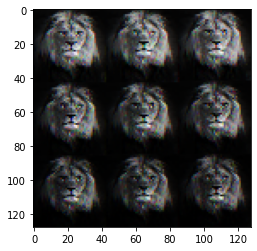

[[0.32300252 0.31636912 0.04736058 0.04116096 0.04571985 0.04177081
  0.05157758 0.05466497 0.03778182 0.04059183]]
0.32300252
0.31636912


In [144]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import random
from keras.models import load_model
from IPython.display import Image
import cv2 as cv
from matplotlib import pyplot as plt


#model = load_model('lion_tiger_cifar10_trained_model_128.h5')

# Get one and predict
r = random.randint(0, 98 - 1)
input_val = x_train[r:r+1]
output_val = model.predict(input_val)

if(output_val[0][0]>output_val[0][1]) :
  animal= 'tiger'
elif(output_val[0][1]>output_val[0][0]): 
  animal='lion'

print(r, "Prediction : ", np.argmax(output_val),animal)
# Selected sample showing
print(input_val[0].shape)
plt.imshow(
    input_val[0]
)
plt.show()

print(output_val)
print(output_val[0][0])
print(output_val[0][1])

45 Prediction :  1 lion
(128, 128, 3)


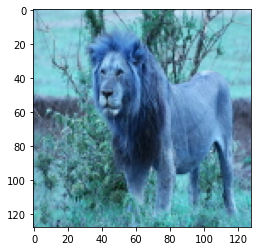

[[3.9189974e-25 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
3.9189974e-25
1.0


In [145]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import random
from keras.models import load_model
from IPython.display import Image
import cv2 as cv
from matplotlib import pyplot as plt

#model = load_model('lion_tiger_cifar10_trained_model_128.h5')
# Get one and predict


img_path = "testlionimage.jpg"
img = cv.imread(img_path)
img.resize(128,128,3)
img = np.expand_dims(img,axis=0)
output_val = model.predict(img)

if(output_val[0][0]>output_val[0][1]) :
  animal= 'tiger'
elif(output_val[0][1]>output_val[0][0]): 
  animal='lion'

print(r, "Prediction : ", np.argmax(output_val),animal)
# Selected sample showing
print(img[0].shape)
plt.imshow(
    img[0],
)
plt.show()

print(output_val)
print(output_val[0][0])
print(output_val[0][1])

27 Prediction :  0 tiger
(128, 128, 3)


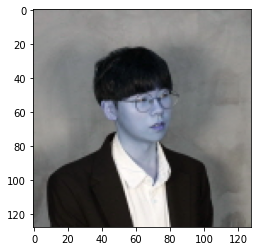

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
0.0


In [133]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import random
from keras.models import load_model
from IPython.display import Image
import cv2 as cv
from matplotlib import pyplot as plt

#model = load_model('lion_tiger_cifar10_trained_model_128.h5')
# Get one and predict


img_path = "testimage.jpg"
img = cv.imread(img_path)
img.resize(128,128,3)
img = np.expand_dims(img,axis=0)
output_val = model.predict(img)

if(output_val[0][0]>output_val[0][1]) :
  animal= 'tiger'
elif(output_val[0][1]>output_val[0][0]): 
  animal='lion'

print(r, "Prediction : ", np.argmax(output_val),animal)
# Selected sample showing
print(img[0].shape)
plt.imshow(
    img[0],
)
plt.show()

print(output_val)
print(output_val[0][0])
print(output_val[0][1])